In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install yfinance

In [3]:
import yfinance as yf
import pandas as pd

In [4]:
nasdaq = yf.download("^IXIC", start="2020-01-01", end="2025-01-01")
nasdaq.head()

/tmp/ipykernel_19/301087339.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nasdaq = yf.download("^IXIC", start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^IXIC,^IXIC,^IXIC,^IXIC,^IXIC
Date,,,,,
2020-01-02,9092.190430,9093.429688,9010.889648,9039.459961,2862700000
2020-01-03,9020.769531,9065.759766,8976.429688,8976.429688,2586520000
2020-01-06,9071.469727,9072.410156,8943.500000,8943.500000,2810450000
2020-01-07,9068.580078,9091.929688,9042.549805,9076.639648,2381740000
2020-01-08,9129.240234,9168.889648,9059.379883,9068.030273,2472620000


In [5]:
nasdaq["return"] = nasdaq["Close"].pct_change()
nasdaq = nasdaq.dropna()
nasdaq.head()

Price,Close,High,Low,Open,Volume,return
Ticker,^IXIC,^IXIC,^IXIC,^IXIC,^IXIC,
Date,,,,,,
2020-01-03,9020.769531,9065.759766,8976.429688,8976.429688,2586520000,-0.007855
2020-01-06,9071.469727,9072.410156,8943.500000,8943.500000,2810450000,0.005620
2020-01-07,9068.580078,9091.929688,9042.549805,9076.639648,2381740000,-0.000319
2020-01-08,9129.240234,9168.889648,9059.379883,9068.030273,2472620000,0.006689
2020-01-09,9203.429688,9215.950195,9158.500000,9202.269531,2540960000,0.008127


In [6]:
nasdaq.to_csv("nasdaq_dataset.csv")

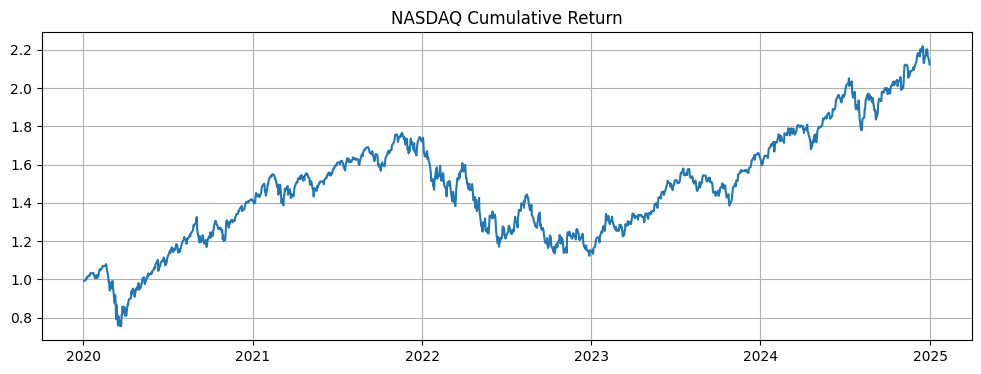

In [7]:
import matplotlib.pyplot as plt

nasdaq["cum_return"] = (1 + nasdaq["return"]).cumprod()

plt.figure(figsize=(12,4))
plt.plot(nasdaq["cum_return"])
plt.title("NASDAQ Cumulative Return")
plt.grid(True)
plt.show()